<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Natural-Language-Processing/blob/main/Anushka_505_Lab2(LLM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Necessary Libraries**

In [ ]:
!pip install transformers

In [ ]:
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

**a. Implement a descriptive Question answering System (Like ChatGPT/Gemini) using NLG by utilizing the LLM Models (any foundation model can use).**

In [ ]:
#Model
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad', return_dict=False)

#Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
question = '''What is Machine Learning?'''

paragraph = ''' Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance
                on a specific task. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or
                decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection
                of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning
                is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods,
                theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and focuses on exploratory
                data analysis through unsupervised learning.In its application across business problems, machine learning is also referred to as predictive analytics. '''

encoding = tokenizer.encode_plus(text=question,text_pair=paragraph)

inputs = encoding['input_ids']  #Token embeddings
sentence_embedding = encoding['token_type_ids']  #Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

In [ ]:
start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

In [ ]:
start_index = torch.argmax(start_scores)

end_index = torch.argmax(end_scores)

answer = ' '.join(tokens[start_index:end_index+1])

In [ ]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 the scientific study of algorithms and statistical models


In [ ]:
question = '''How many parameters does BERT-large have?'''

paragraph = ''' BERT-large is really big... it has 24-layers and an embedding size of 1,024, for a total of 340M parameters! Altogether it is 1.34GB, so expect it to take a couple minutes to download to your Colab instance.'''

encoding = tokenizer.encode_plus(text=question,text_pair=paragraph)

inputs = encoding['input_ids']  #Token embeddings
sentence_embedding = encoding['token_type_ids']  #Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

In [ ]:
start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

In [ ]:
start_index = torch.argmax(start_scores)

end_index = torch.argmax(end_scores)

answer = ' '.join(tokens[start_index:end_index+1])

In [ ]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 340m


**b. While testing the Model, Understand the concept of Prompt Engineering, Optimization of the Prompt and Understand the impact of prompt formulation on model output.**

**1st Prompt**

In [ ]:
question = '''UGC Act when?'''

paragraph = ''' Christ (Deemed to be University) was born out of the educational vision of St. Kuriakose Elias Chavara, an educationist and social reformer of the nineteenth century
in South India. Chavara founded the first indigenous Catholic congregation Carmelites of Mary Immaculate (CMI) in 1831, which administers Christ (Deemed to be University).
Established in 1969 as Christ College, the University Grants Commission (UGC) of India conferred autonomy to Christ College in 2004 and identified it as an "institution with
potential for excellence" in 2006. In 2008 under section 3 of the UGC Act, 1956, the Ministry of Human Resource Development of the Government of India, declared the institution a
"deemed to be university" in the name and style of Christ University. Later in 2018, upon the direction of Supreme Court of India, the word university was removed, thus making it
Christ (Deemed to be University). Christ was one of the first institutions in India to be accredited in 1998 by the National Assessment and Accreditation Council (NAAC), and
subsequently in 2004, 2016 and 2022 had been awarded Grade 'A+' on 4-point scale.'''

encoding = tokenizer.encode_plus(text=question,text_pair=paragraph)

inputs = encoding['input_ids']  #Token embeddings
sentence_embedding = encoding['token_type_ids']  #Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

In [ ]:
start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

In [ ]:
start_index = torch.argmax(start_scores)

end_index = torch.argmax(end_scores)

answer = ' '.join(tokens[start_index:end_index+1])

In [ ]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 1956


**2nd Prompt**

In [ ]:
question = '''Under UGC Act, when was Christ declared a deemed-to-be university?'''

paragraph = ''' Christ (Deemed to be University) was born out of the educational vision of St. Kuriakose Elias Chavara, an educationist and social reformer of the nineteenth century
in South India. Chavara founded the first indigenous Catholic congregation Carmelites of Mary Immaculate (CMI) in 1831, which administers Christ (Deemed to be University).
Established in 1969 as Christ College, the University Grants Commission (UGC) of India conferred autonomy to Christ College in 2004 and identified it as an "institution with
potential for excellence" in 2006. In 2008 under section 3 of the UGC Act, 1956, the Ministry of Human Resource Development of the Government of India, declared the institution a
"deemed to be university" in the name and style of Christ University. Later in 2018, upon the direction of Supreme Court of India, the word university was removed, thus making it
Christ (Deemed to be University). Christ was one of the first institutions in India to be accredited in 1998 by the National Assessment and Accreditation Council (NAAC), and
subsequently in 2004, 2016 and 2022 had been awarded Grade 'A+' on 4-point scale.'''

encoding = tokenizer.encode_plus(text=question,text_pair=paragraph)

inputs = encoding['input_ids']  #Token embeddings
sentence_embedding = encoding['token_type_ids']  #Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

In [ ]:
start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

In [ ]:
start_index = torch.argmax(start_scores)

end_index = torch.argmax(end_scores)

answer = ' '.join(tokens[start_index:end_index+1])

In [ ]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 2008


**c. Enter any 3 the same prompt in your model, Gemini and ChatGPT and retrieve the answer and upload. Understand the difference of prompt in each model (as shown the following Gemini and ChatGPT).**

**d. Upload any 3 the sample question and answers that you have generated (in Colab file).**

1. First Question that was asked to both the Models (Gemini and ChatGPT) was "CMI" with no further clarification.

ChatGPT:
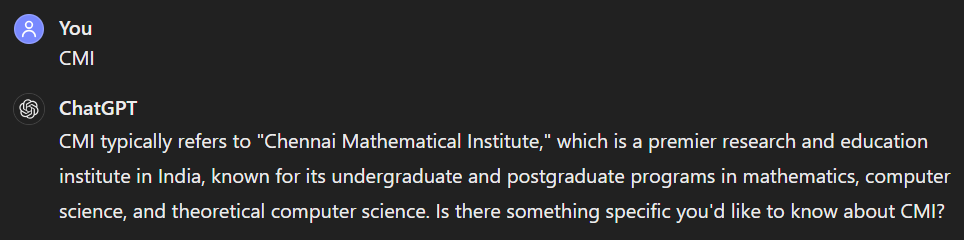

GEMINI:

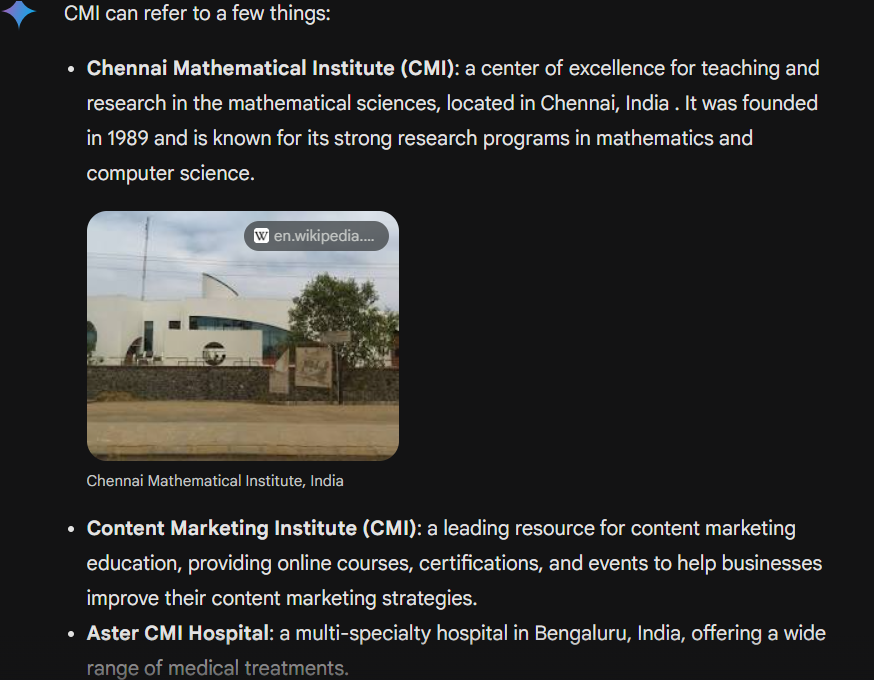


2. Second prompt was a bit more clarifying than the first one, where I wrote "CMI Church". This was how the models answered.

ChatGPT:

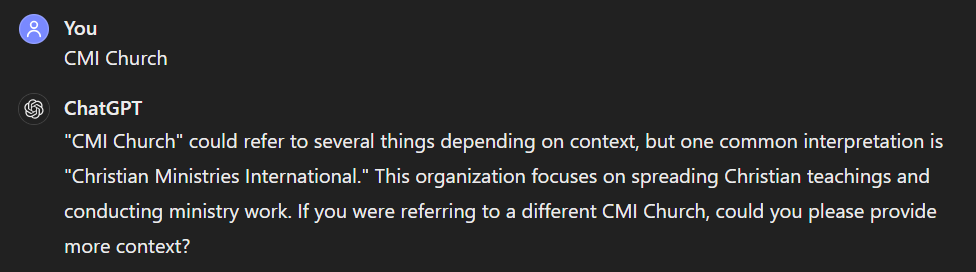

GEMINI:

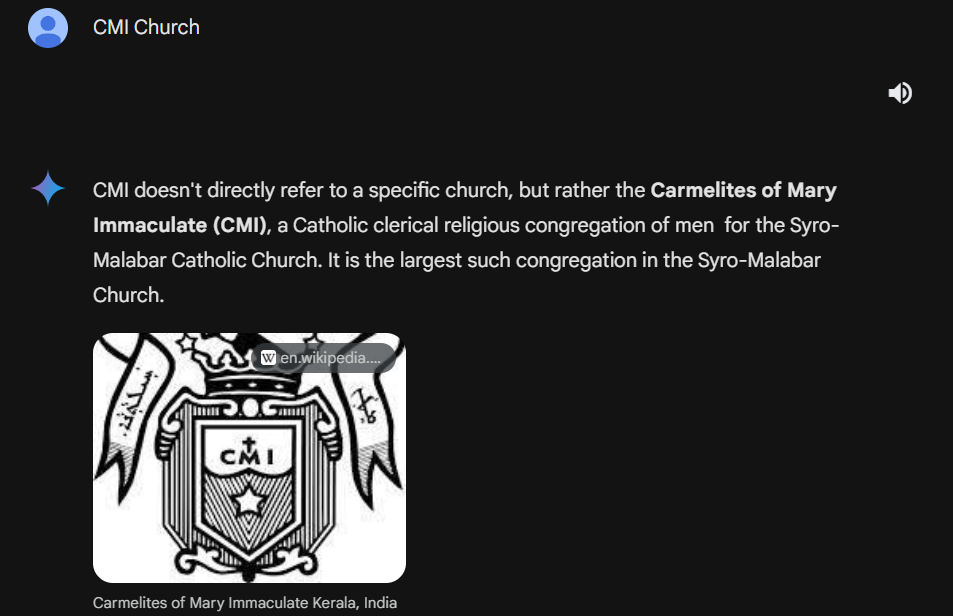


3. Thirdly I directly named the congregation I want an answer for and hence wrote: "Carmelites of Mary Immaculate". Here is how the models responded.

ChatGPT:

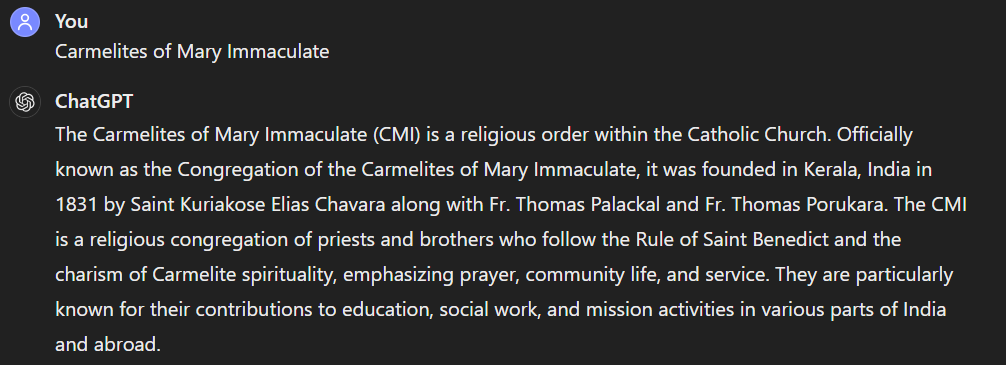

GEMINI:

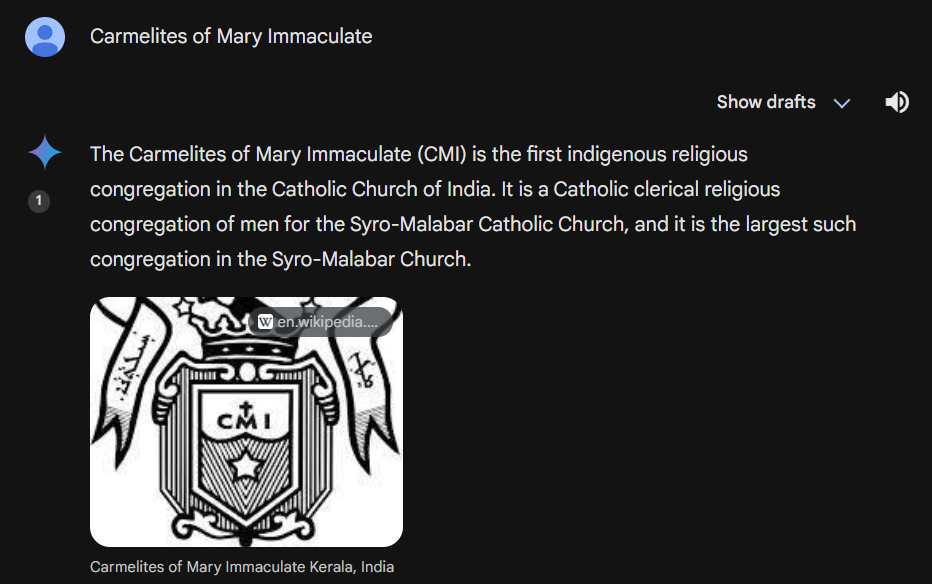

**INFERENCE**

For the first prompt, "CMI", ChatGPT gave us the most famous option which is the Chennai Mathematical Institute located in Chennai, whereas Gemini didn't give us a singular answer, instead it gave us a plethora of option as to what the abbreviation could mean.

For the second prompt, "CMI Church", ChatGPT still couldn't provide us with the answer we wanted, whereas Gemini correctly identified the answer we were looking for and even corrected us further

For the third prompt, "Carmelites of Mary Immaculate", ChatGPT finally gave us the correct answer, and Gemini already gave us the answer in the previous prompt so this time also it generated the correct answer.